In [77]:
import numpy as np
import pandas as pd

print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')

numpy version: 2.0.0
pandas version: 2.2.2


In [78]:
#sales material dataframe
skus = pd.DataFrame(
    data = {
        'material' : [12345, 12346, 12347, 12348, 12349, 12350],
        'brand' : ['heineken', 'heineken', 'amstel', 'amstel', 'devassa', 'schin'],
        'packtype' : ['RGB', 'OW', 'RGB', 'OW', 'OW', 'OW'],
        'segmento' : ['premium', 'premium', 'mainstream', 'mainstream', 'mainstream', 'economy']
    }
)
skus

,material,brand,packtype,segmento
0,12345,heineken,RGB,premium
1,12346,heineken,OW,premium
2,12347,amstel,RGB,mainstream
3,12348,amstel,OW,mainstream
4,12349,devassa,OW,mainstream
5,12350,schin,OW,economy


In [79]:
generator = np.random.default_rng(seed=123)
sales = pd.DataFrame(
    data = {
        'month' : pd.Series(generator.choice(['06 jun', '07 jul', '08 ago', '09 set', '10 out'], size=50), dtype='string'),
        'material' : generator.choice(skus['material'], size=50),
        'volume' : np.round(generator.uniform(low=0.001, high=10.000, size=50), 3)
    }
)
sales = sales.sort_values(by='month').reset_index(drop=True)
sales.head(10)

,month,material,volume
0,06 jun,12347,1.278
1,06 jun,12347,1.516
2,06 jun,12349,1.378
3,06 jun,12345,2.288
4,06 jun,12348,0.060
5,06 jun,12348,4.857
6,06 jun,12348,8.110
7,06 jun,12347,0.304
8,06 jun,12347,3.811
9,06 jun,12350,6.165


In [80]:
sales.info()
sales['volume'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     50 non-null     string 
 1   material  50 non-null     int64  
 2   volume    50 non-null     float64
dtypes: float64(1), int64(1), string(1)
memory usage: 1.3 KB


count    50.000000
mean      4.673380
std       2.714445
min       0.033000
25%       2.753750
50%       4.534500
75%       6.473750
max       9.505000
Name: volume, dtype: float64

In [81]:
#lets replicate the describe method
sales.loc[:,['volume']].agg(['count', 'mean', 'median', 'std', 'min', 'max', lambda c: c.quantile(0.25)])
sales.loc[:,['volume']].agg(
    count = ('volume', 'count'),
    mean = ('volume', 'mean'),
    std = ('volume', 'std'),
    min = ('volume', 'min'),
    quantile_25 = ('volume', lambda c: c.quantile(0.25)),
    quantile_50 = ('volume', lambda c: c.quantile(0.5)),
    quantile_75 = ('volume', lambda c: c.quantile(0.75)),
    max = ('volume', 'max'),
    sum = ('volume', 'sum')
)

,volume
count,50.000000
mean,4.673380
std,2.714445
min,0.033000
quantile_25,2.753750
quantile_50,4.534500
quantile_75,6.473750
max,9.505000
sum,233.669000


In [82]:
sales_full = pd.merge(left=sales, right=skus, how='left', on='material')
sales_bybrand = sales_full.groupby('brand')[['volume']].agg('sum')
sales_bybrand

,volume
brand,
amstel,77.141
devassa,28.896
heineken,80.260
schin,47.372


In [83]:
sales_full = sales_full.convert_dtypes()
sales_full.loc[sales_full['brand'] == 'schin', 'brand'] = np.nan
sales_full.isnull().sum()/sales_full.shape[0]*100

month        0.0
material     0.0
volume       0.0
brand       16.0
packtype     0.0
segmento     0.0
dtype: float64

In [84]:
sales_full.select_dtypes(include='string').columns
sales_full.describe(include='string').T

,count,unique,top,freq
month,50,5,07 jul,13
brand,42,3,amstel,19
packtype,50,2,OW,34
segmento,50,3,mainstream,26


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

print(f'seaborn version: {sns.__version__}')

seaborn version: 0.13.2


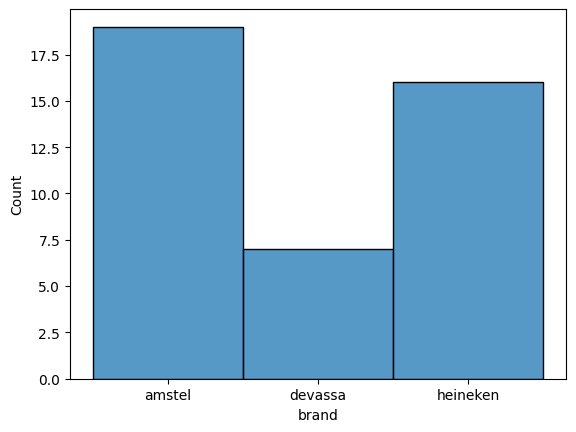

In [86]:
sns.histplot(data=sales_full, x=sales_full['brand'])
plt.show()

In [87]:
#one hot encoding, which separates the 3 values in brand column into 3 new columns, each with truee or false
pd.get_dummies(data=sales_full, columns=['brand']).head()

,month,material,volume,packtype,segmento,brand_amstel,brand_devassa,brand_heineken
0,06 jun,12347,1.278,RGB,mainstream,True,False,False
1,06 jun,12347,1.516,RGB,mainstream,True,False,False
2,06 jun,12349,1.378,OW,mainstream,False,True,False
3,06 jun,12345,2.288,RGB,premium,False,False,True
4,06 jun,12348,0.06,OW,mainstream,True,False,False


In [94]:
#categorical dtype encoding
sales_full['brand'] = sales_full['brand'].astype('category').cat.codes
sales_full.head(15)

,month,material,volume,brand,packtype,segmento
0,06 jun,12347,1.278,1,RGB,mainstream
1,06 jun,12347,1.516,1,RGB,mainstream
2,06 jun,12349,1.378,2,OW,mainstream
3,06 jun,12345,2.288,3,RGB,premium
4,06 jun,12348,0.06,1,OW,mainstream
5,06 jun,12348,4.857,1,OW,mainstream
6,06 jun,12348,8.11,1,OW,mainstream
7,06 jun,12347,0.304,1,RGB,mainstream
8,06 jun,12347,3.811,1,RGB,mainstream
9,06 jun,12350,6.165,0,OW,economy
